In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [77]:
# Load processed CSV file

processed_file_path = '../data/processed/'
processed_file_name = 'wastewater_tank1_processed.csv'

fig_file_path = '../figures/'

df = pd.read_csv(processed_file_path + processed_file_name, index_col=0, parse_dates=True)

In [105]:
ROWS_IN_A_DAY = int(24*6)
ROWS_IN_A_WEEK = ROWS_IN_A_DAY*7

IND = 50007

cols_to_plot = ['N2O', 'NH4', 'NO3', 'PO4', 'DO', 'SS','temperature', 'airflow', 'wastewater_inflow']
cols_units = ['mg-N/L', 'mg-N/L', 'mg-N/L', 'mg-P/L', 'mg/L', 'g/L', '°C', 'Nm$^3$/h', 'm$^3$/h']

n_plots = len(cols_to_plot)

colors = [
    "#1f77b4",  # muted blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#17becf",  # cyan
]

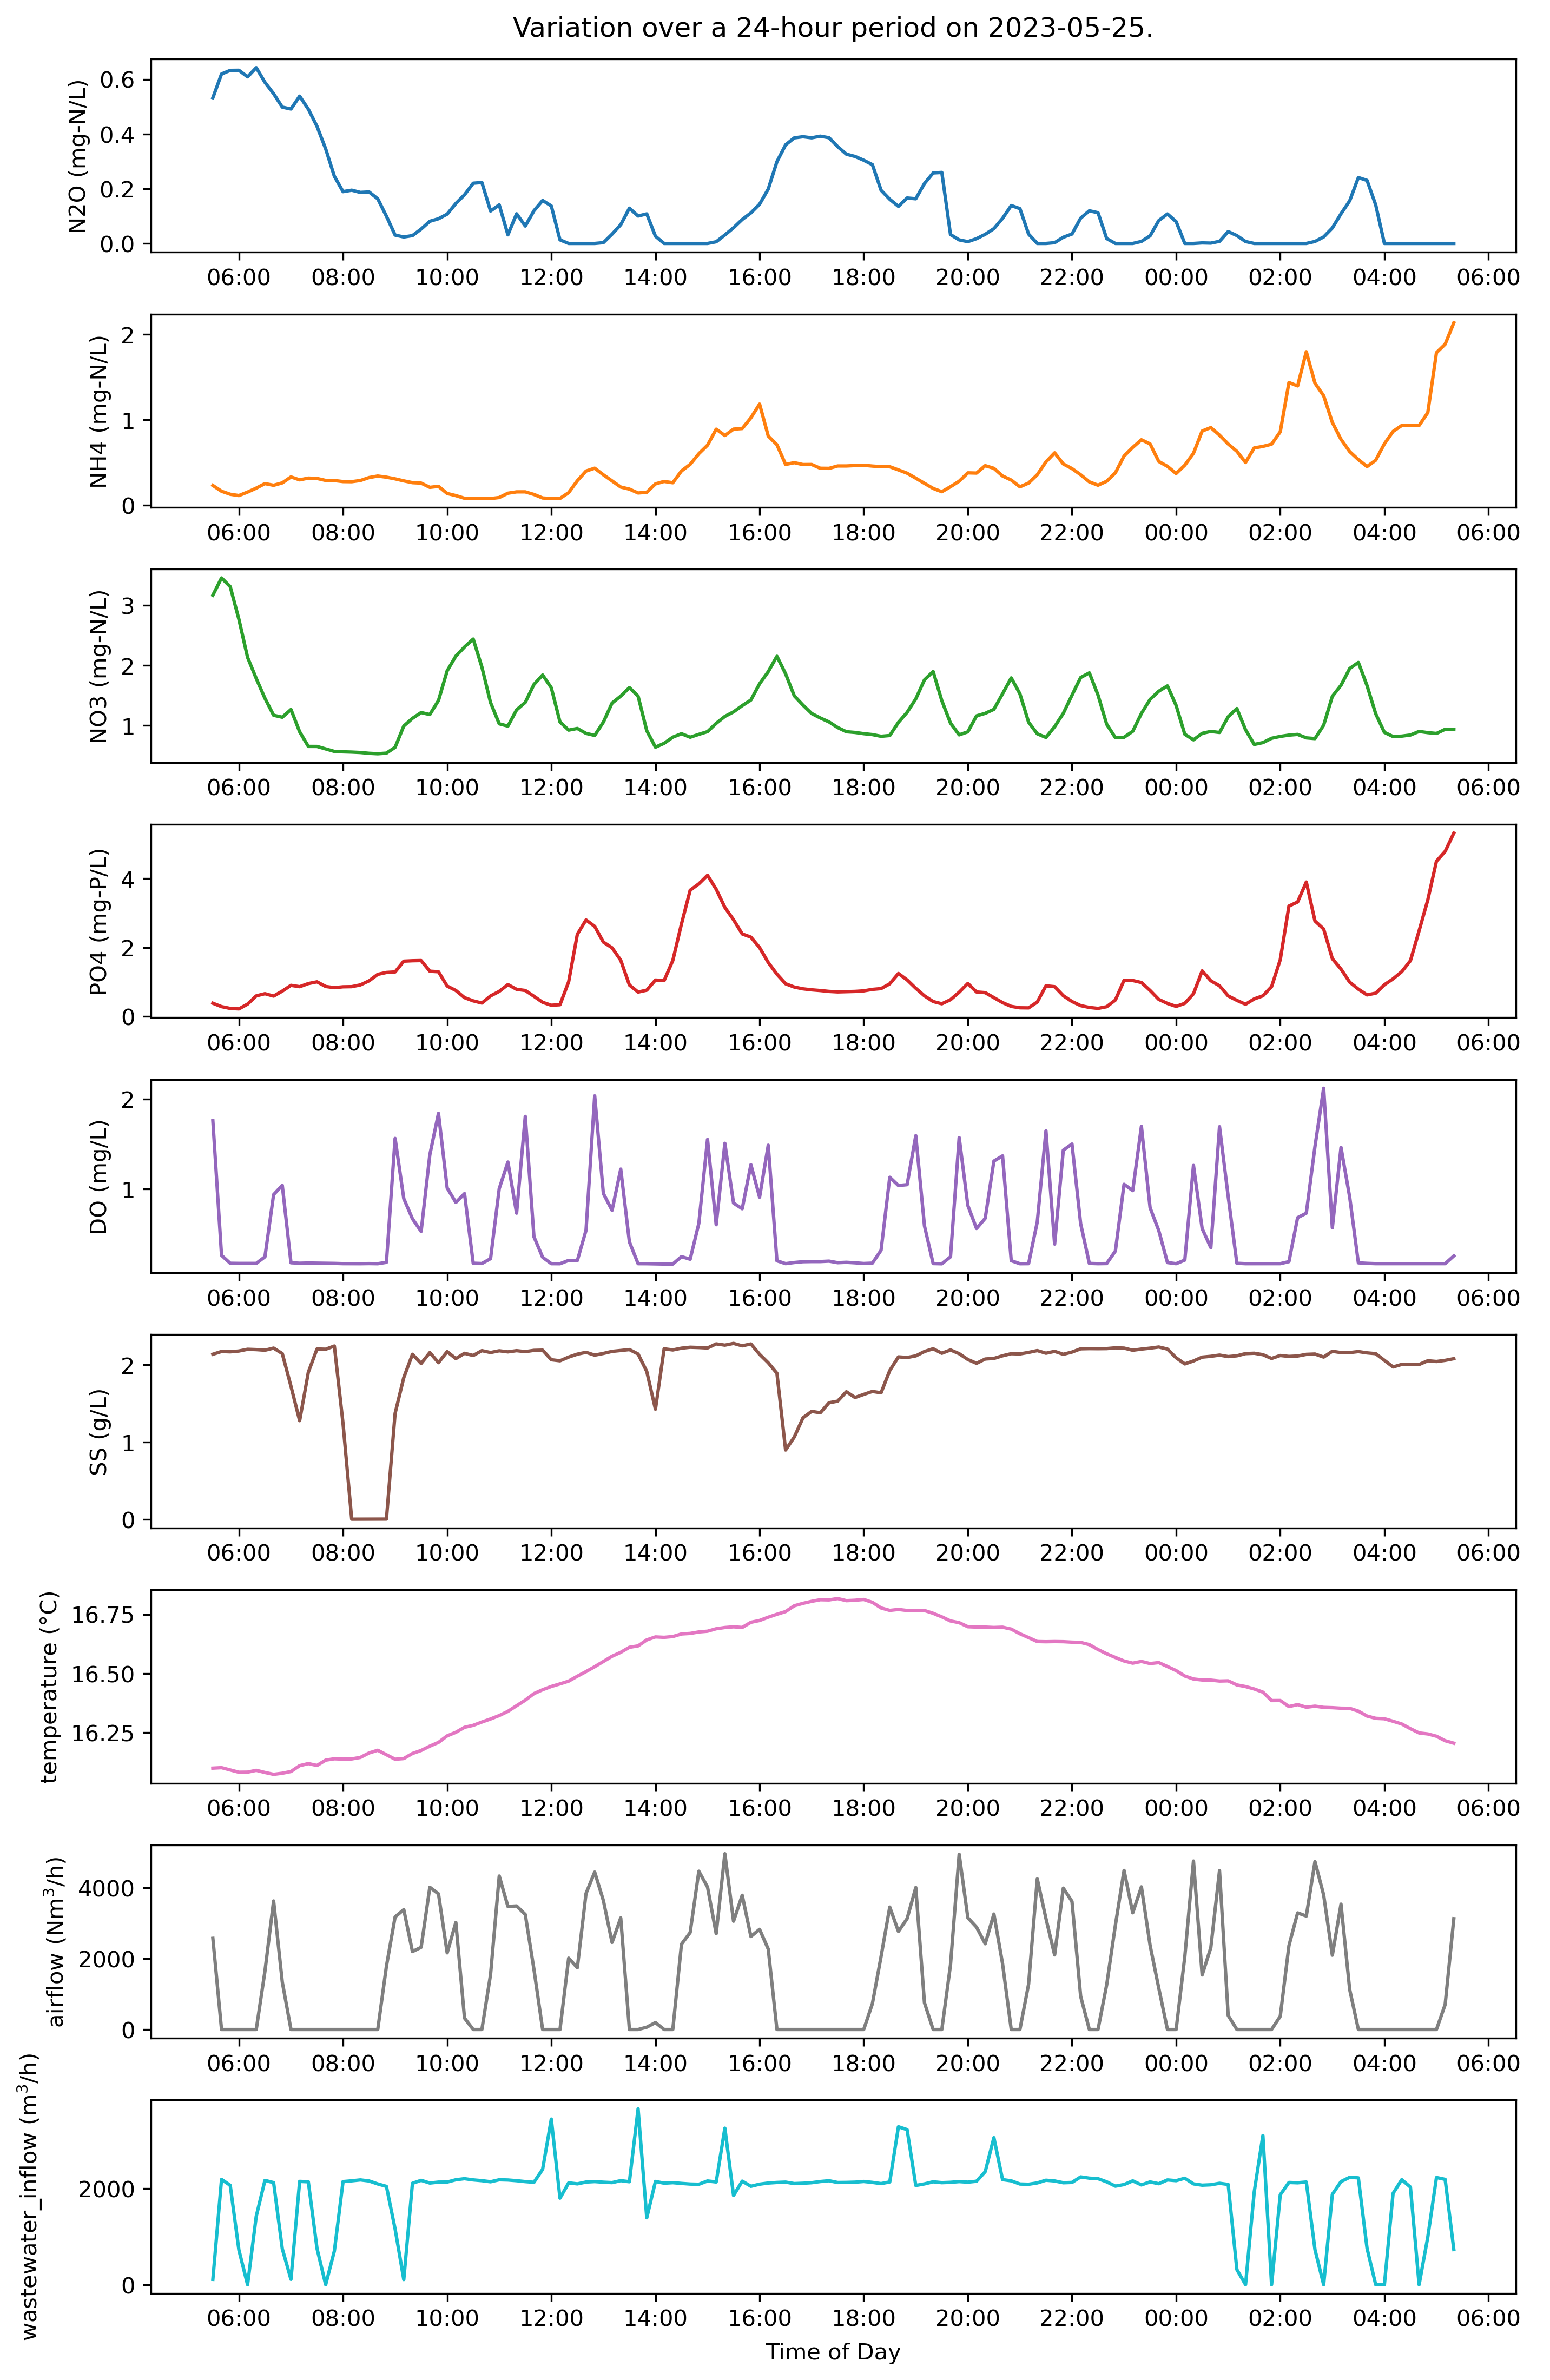

In [107]:
one_day_snapshot = df.iloc[IND:IND + ROWS_IN_A_DAY]

fig, ax = plt.subplots(n_plots, 1, figsize = (10, 15), dpi = 300)

for i, col in enumerate(cols_to_plot):
    ax[i].plot(one_day_snapshot.index, one_day_snapshot[col], color = colors[i])
    ax[i].set_ylabel(col + " (" + cols_units[i] + ")")
    ax[i].xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

ax[-1].set_ylabel(cols_to_plot[-1] + " (" + cols_units[-1] + ")", labelpad = 15)

fig.add_subplot(111, frameon = False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.tight_layout()
plt.xlabel("Time of Day", labelpad = 5)
plt.title("Variation over a 24-hour period on " + str(one_day_snapshot.index[0].date()) + ".", pad = 10)

fig.tight_layout()

fig_file_name = 'variation_24_hr.png'

plt.savefig(fig_file_path + fig_file_name)

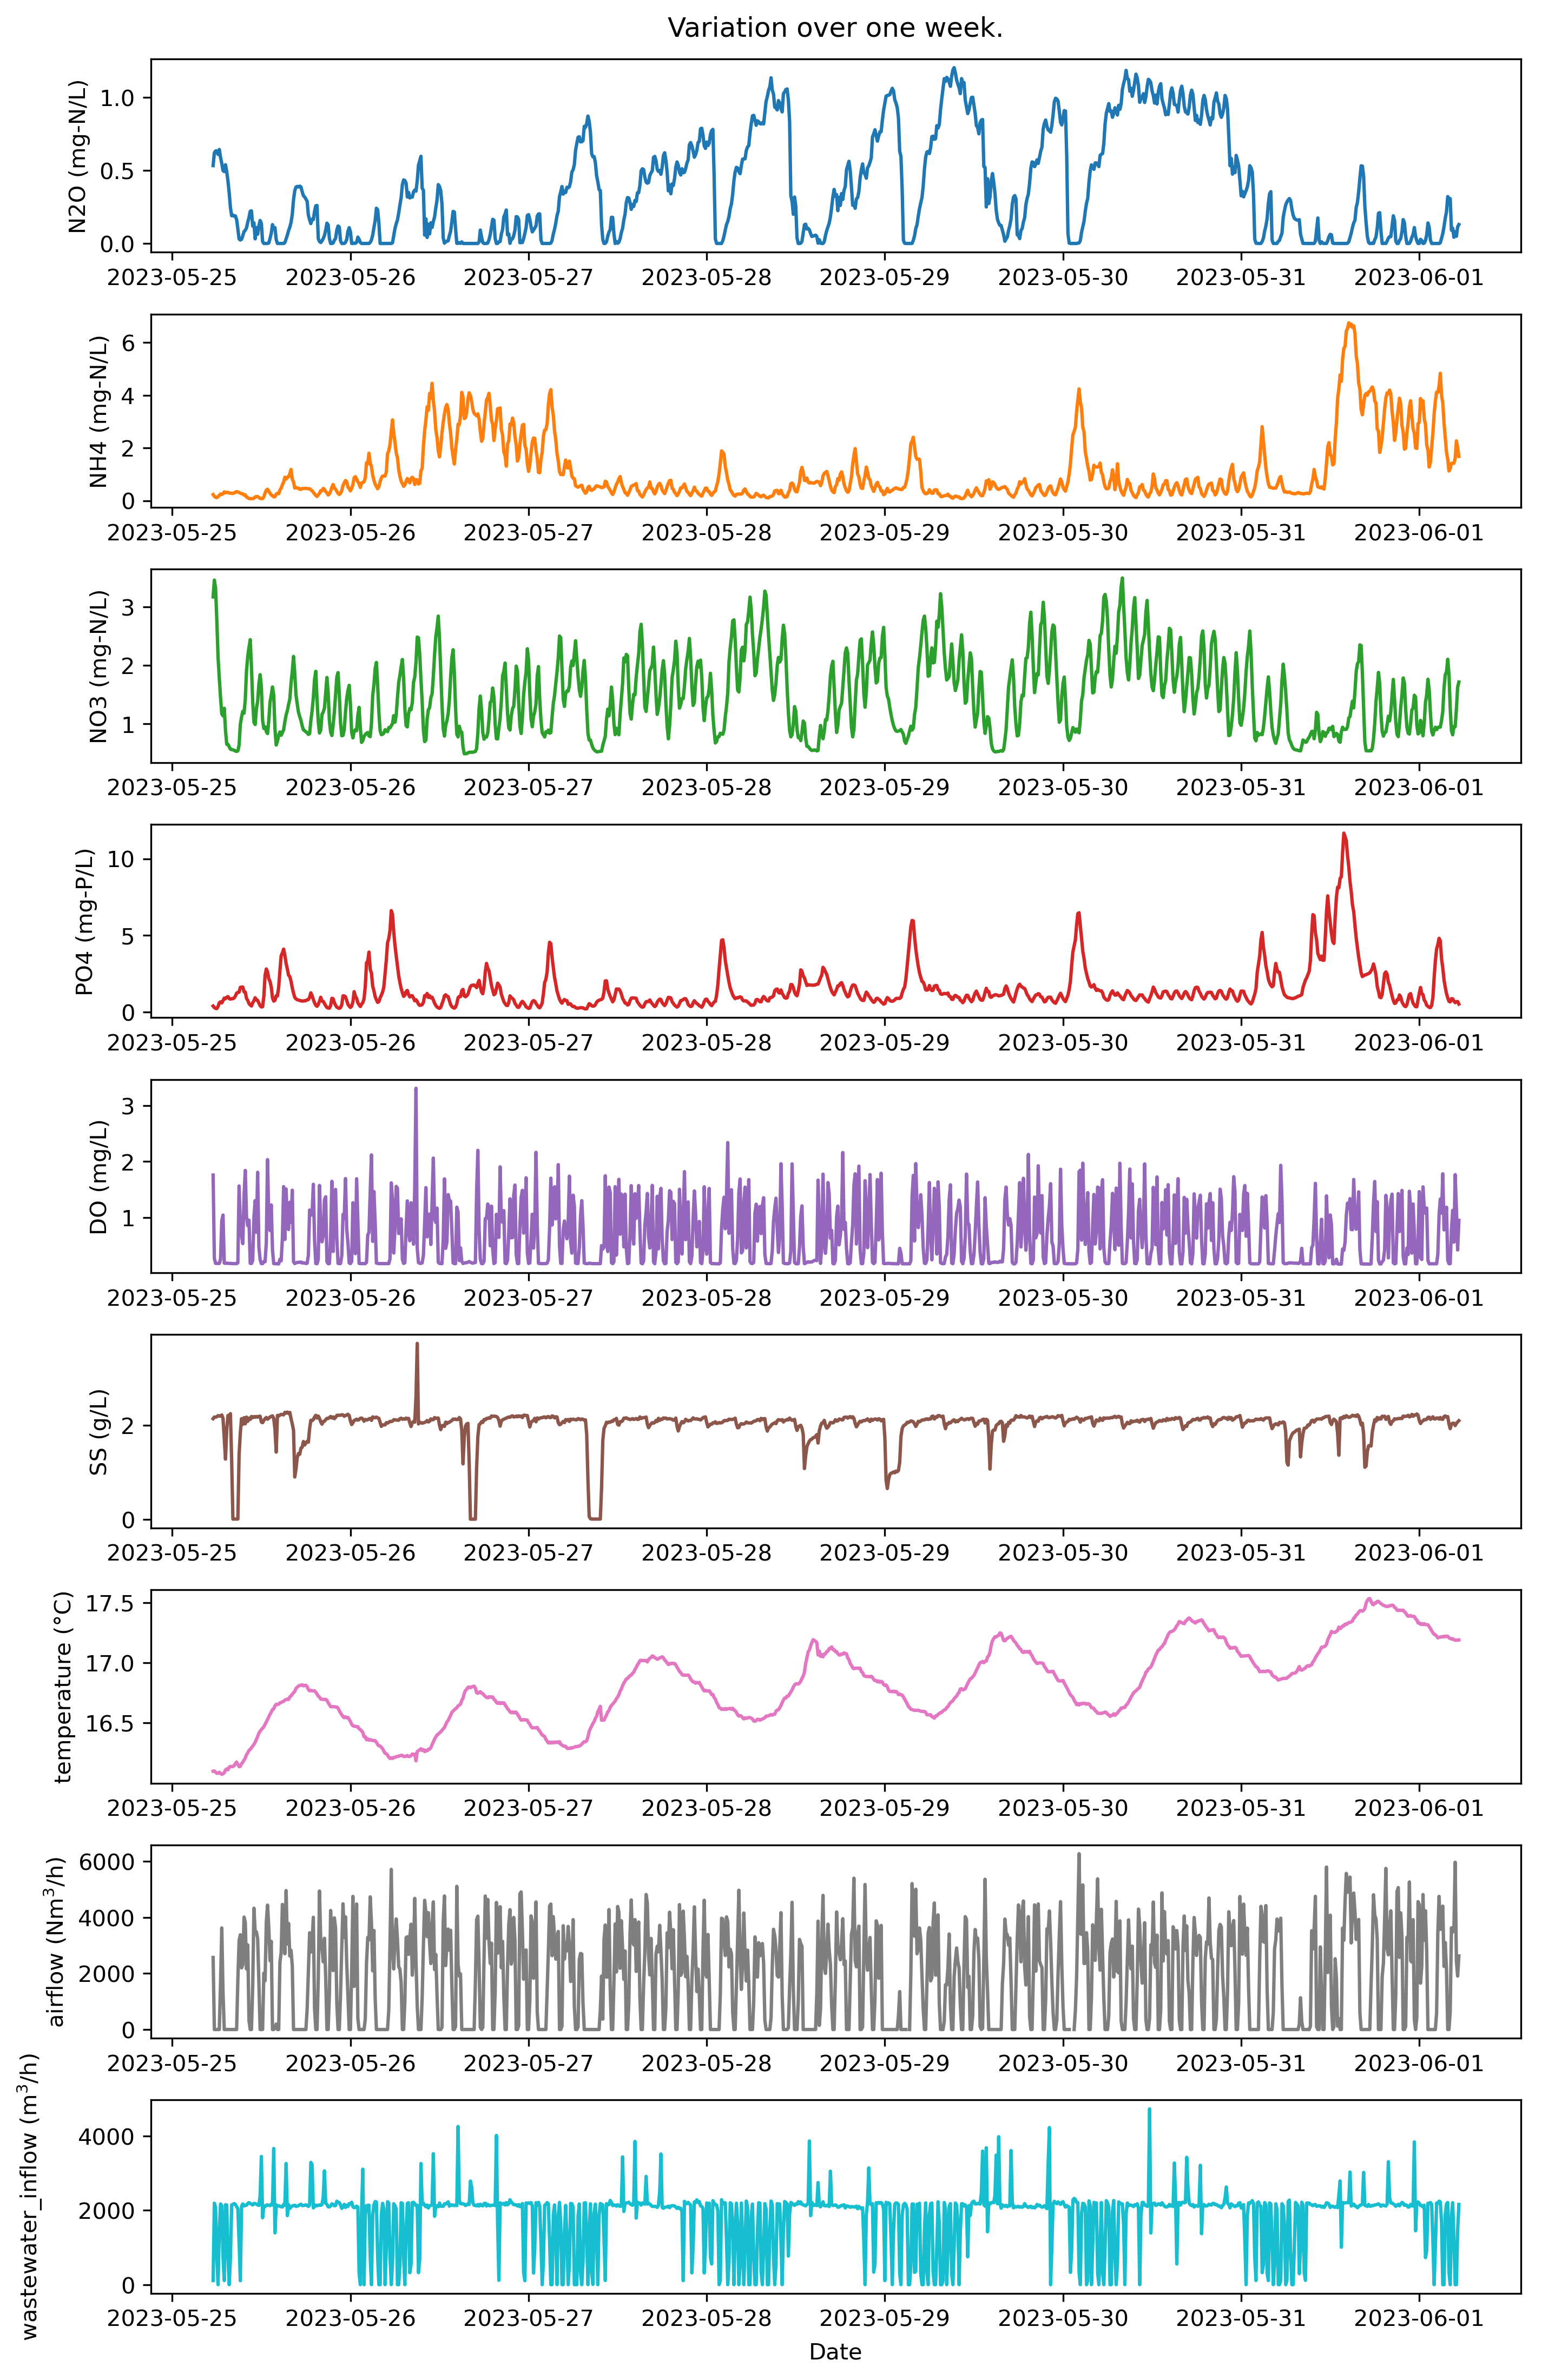

In [109]:
one_week_snapshot = df.iloc[IND:IND + ROWS_IN_A_WEEK]

fig, ax = plt.subplots(n_plots, 1, figsize = (10, 15), dpi = 300)

for i, col in enumerate(cols_to_plot):
    ax[i].plot(one_week_snapshot.index, one_week_snapshot[col], color = colors[i])
    ax[i].set_ylabel(col + " (" + cols_units[i] + ")")
    ax[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

ax[-1].set_ylabel(cols_to_plot[-1] + " (" + cols_units[-1] + ")", labelpad = 15)

fig.add_subplot(111, frameon = False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.tight_layout()
plt.xlabel("Date", labelpad = 5)
plt.title("Variation over one week.", pad = 10)

fig.tight_layout()

fig_file_name = 'variation_1_wk.png'

plt.savefig(fig_file_path + fig_file_name)

Some notes on the above:

- Airflow and Dissolved Oxygen seem mostly proportional to one another, so I will drop the airflow column. 

- Instead of the wastewater inflow rate as a feature, it may be better to transform the total amount of wastewater that's flowed in in a certain time interval, the area under the wasterwater_inflow curve.

- N20 has strong dependence on it's own lag and the lag of the other molecules. Will be important to consider all these features in a model.